In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
may = pd.read_csv('sentiments_may.csv')
june = pd.read_csv('sentiments.csv')

In [22]:
len(may), len(june)

(235444, 143511)

In [23]:
oakland_may = may[may['city'] == 'Oakland']
oakland_june = june[june['city'] == 'Oakland']

In [35]:
len(oakland_may), len(oakland_june)

(38590, 23397)

In [28]:
oakland = pd.concat([oakland_may, oakland_june])

In [24]:
oakland_may.head()

,text,location,coords,city,county,sentiment
2,@abcdefghijkLMAO What a little slice of heaven...,"Oakland, CA",NaN,Oakland,Alameda,1
4,I wasn’t ready for the end of Waco https://t.c...,"Oakland, CA",NaN,Oakland,Alameda,1
7,Damnnn🤣🤣 https://t.co/TZTrGzyYsV,"Oakland, CA",NaN,Oakland,Alameda,1
9,jar is my personal hype man &amp; i love her 🥺...,"Oakland, CA",NaN,Oakland,Alameda,1
13,@itatiVCS I’m crying😂😂😂 https://t.co/WvbrIHw1IB,"Oakland, CA",NaN,Oakland,Alameda,1


In [27]:
observed_diff = np.mean(oakland_may['sentiment']) - np.mean(oakland_june['sentiment'])
observed_diff

0.078854288854139

In [37]:
np.random.seed(42)

stats = []
for _ in range(10000):
    permuted = np.random.choice(oakland['sentiment'], len(oakland))
    may, june = permuted[:len(oakland_may)], permuted[len(oakland_may):]
    stats.append(np.mean(may) - np.mean(june))

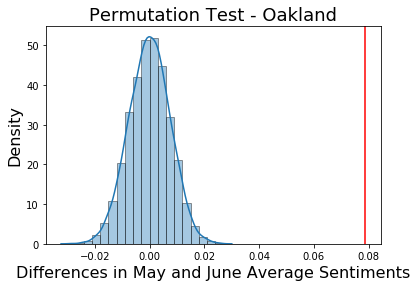

In [63]:
sns.distplot(stats, bins=np.arange(-.03, .04, .003), hist_kws=dict(edgecolor="k", linewidth=1))
plt.axvline(x=observed_diff, color='r')
plt.title('Permutation Test - Oakland', size=18)
plt.xlabel('Differences in May and June Average Sentiments', size=16)
plt.ylabel('Density', size=16)
plt.savefig('oakland_permutation_test.jpg');

In [42]:
sum(stats >= observed_diff) / len(stats)

0.0